<a href="https://colab.research.google.com/github/shashankchintu99/semester3-projects/blob/main/deeplearning/assignments/ShashankReddy_Kandimalla_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Importing  necessary libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix
from torchvision import models, transforms


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Step 1 :Create your custom dataset featuring 3 custom categories of at least 100 images each

In [11]:


# folder path in the drive
data_folder = '/content/drive/MyDrive/pc_parts'

# specifying the desired categories for the classification
selected_categories = ['cpu', 'gpu', 'ram',"motherboard"]

# Initializing label_encoder and image_counts globally
label_encoder = {category: i for i, category in enumerate(selected_categories)}
image_counts = {i: 0 for i in range(len(selected_categories))}

def load_images_all(folder_path, selected_categories):
    images = []
    labels = []
    global image_counts

    for category in selected_categories:
        category_path = os.path.join(folder_path, category)
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
            image = cv2.resize(image, (180, 180))  # converting the image size to 180X180
            images.append(image)
            labels.append(label_encoder[category])
            image_counts[label_encoder[category]] += 1

    return np.array(images), np.array(labels)

# Load and preprocess all images
all_images, all_labels = load_images_all(data_folder, selected_categories)

# Display the counts
for category in selected_categories:
    print(f"Number of images in {category} category: {image_counts[label_encoder[category]]}")


Number of images in cpu category: 142
Number of images in gpu category: 156
Number of images in ram category: 226
Number of images in motherboard category: 241


##Plotting few sample images for each category

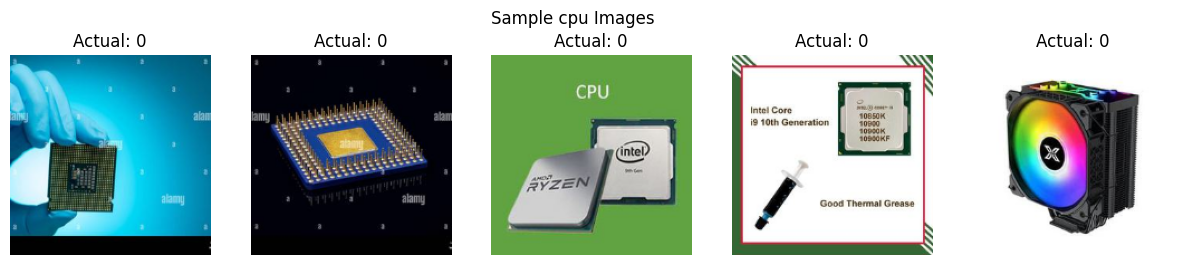

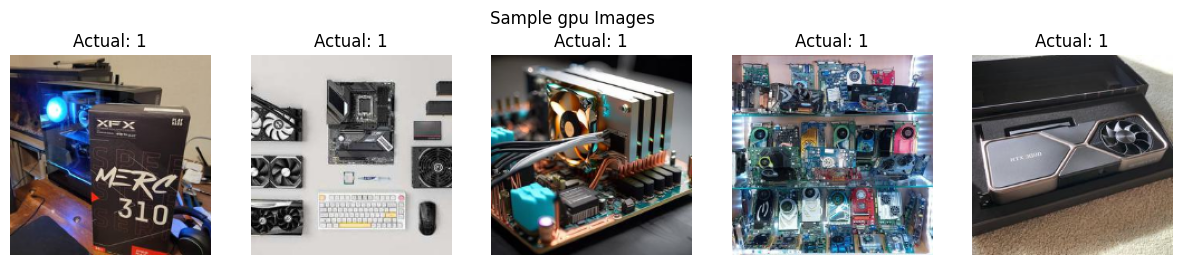

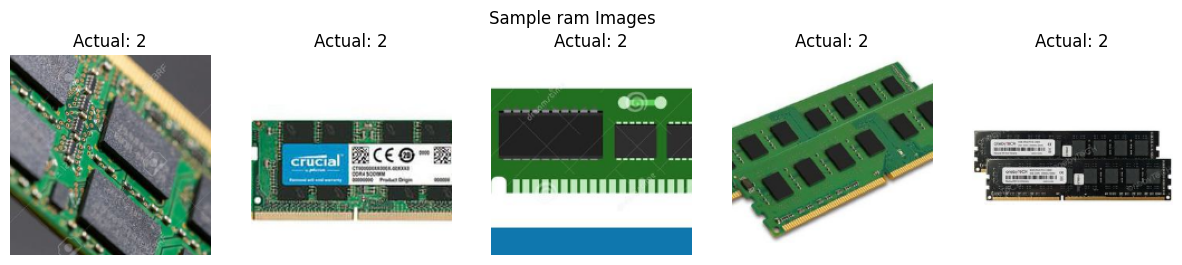

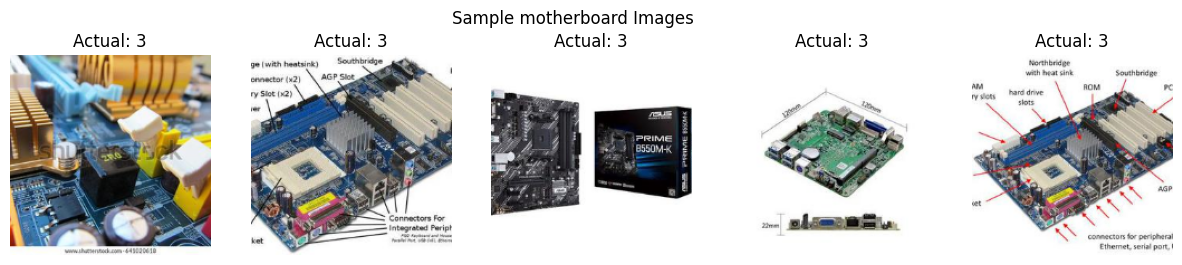

In [12]:


# Displaying  a few sample images for each category
for category in selected_categories:
    category_images = all_images[all_labels == label_encoder[category]][:5]


    fig, axes = plt.subplots(1, 5, figsize=(15, 3))

    for i in range(5):
        # Converting the image array to PIL Image
        pil_image = Image.fromarray(np.uint8(category_images[i]))

        # Displaying the image
        axes[i].imshow(pil_image)
        axes[i].set_title(f'Actual: {label_encoder[category]}')
        axes[i].axis('off')

    # Set the title for the entire figure
    fig.suptitle(f'Sample {category} Images')
    plt.show()


we have made use of PIL. library which is  suitable for complex image processing tasks than Matplotlib

## Step 2. Split this data between 80% training and 20% test

In [13]:


# Split the data
train_images, test_images, train_labels, test_labels = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)


## Step 3. Preprocess the data as you see fit

In [14]:
# Preprocessing the data as you see fit by normalizing the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

## Step 4. Create a Convolutional Neural Network model to learn about your training set

##Defining the model

In [15]:
import torch.nn as nn
import torch.nn.functional as Fs

num_classes = len(selected_categories)  # Ensure 'selected_categories' is defined
#defining the model
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(128, 256, kernel_size=3, padding=1),  # Additional convolutional layer
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Flatten(),

    nn.Linear(256 * 11 * 11, 256),  # Adjusted for the additional convolutional layer
    nn.ReLU(),

    nn.Linear(256, 128),  # Additional fully connected layer
    nn.ReLU(),

    nn.Linear(128, num_classes)
)


###converting the data into pytorch tensors and taking the batch size as 64 ,defining the loss function and optimizers and training the model.

In [16]:


# Convert data to PyTorch tensors
train_images_tensor = torch.tensor(train_images.transpose((0, 3, 1, 2)), dtype=torch.float32)
test_images_tensor = torch.tensor(test_images.transpose((0, 3, 1, 2)), dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

#  DataLoader instances
batch_size = 64  # taking 64 images as the batch size
train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

#  loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10  # Adjust the number of epochs as needed
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")



Epoch 1/10, Loss: 1.371564507484436
Epoch 2/10, Loss: 1.370840311050415
Epoch 3/10, Loss: 1.3392540216445923
Epoch 4/10, Loss: 1.383349061012268
Epoch 5/10, Loss: 1.3497486114501953
Epoch 6/10, Loss: 1.3597146272659302
Epoch 7/10, Loss: 1.4306000471115112
Epoch 8/10, Loss: 1.2743421792984009
Epoch 9/10, Loss: 1.2198717594146729
Epoch 10/10, Loss: 1.2612601518630981


##Step 5. Make predictions on the test data and compare them to the expected categories

In [17]:


# Placeholders for all predictions and labels
all_preds = []
all_labels = []

# No gradient needed for evaluation
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert lists to numpy arrays for sklearn functions
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate accuracy
accuracy = np.sum(all_preds == all_labels) / len(all_labels)

# Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

# Print accuracy
print(f'Accuracy of the model on the test images: {accuracy * 100:.2f}%')


Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.29      0.36        31
           1       0.47      0.31      0.38        29
           2       0.51      0.77      0.61        44
           3       0.58      0.57      0.58        49

    accuracy                           0.52       153
   macro avg       0.51      0.49      0.48       153
weighted avg       0.52      0.52      0.51       153

Confusion Matrix:
[[ 9  0 15  7]
 [ 2  9 10  8]
 [ 2  3 34  5]
 [ 6  7  8 28]]
Accuracy of the model on the test images: 52.29%


##displaying sample images and their predicted outputs

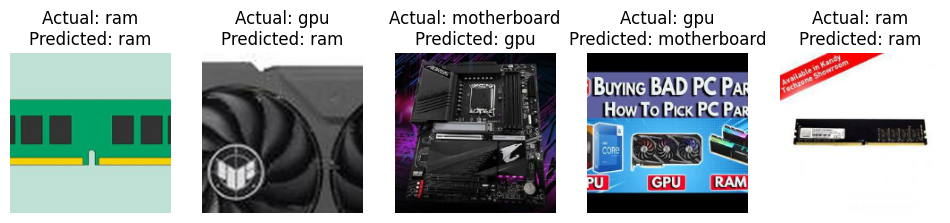

In [18]:


# Ensure the model is in evaluation mode
model.eval()

# Make predictions on the test data
predictions = []
with torch.no_grad():
    for i in range(len(test_images_tensor)):
        output = model(test_images_tensor[i].unsqueeze(0))  # Add batch dimension
        predictions.append(output)

# Convert predictions to numpy array for easier processing
predictions = torch.cat(predictions, dim=0)
predicted_classes = torch.argmax(predictions, dim=1).numpy()

# Visualize the results
plt.figure(figsize=(12, 8))
for i in range(5):  # Display first 5 images and predictions
    plt.subplot(1, 5, i + 1)
    pil_image = Image.fromarray((test_images[i] * 255).astype(np.uint8))  # Convert back to PIL image
    plt.imshow(pil_image)
    actual_category = selected_categories[test_labels[i]]  # Get the actual category name
    predicted_category = selected_categories[predicted_classes[i]]  # Get the predicted category name
    plt.title(f'Actual: {actual_category}\nPredicted: {predicted_category}')
    plt.axis('off')
plt.show()


##Step 6: Use GoogleNet(InceptionNet) and add a LinearLayer on top of it.

In [19]:


# Assuming train_images and test_images are numpy arrays of type float64 in range [0, 1]

# Convert the images to uint8
train_images_uint8 = (train_images * 255).astype(np.uint8)
test_images_uint8 = (test_images * 255).astype(np.uint8)

# Define the transform
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply the transform to your datasets
train_images_tensor = torch.stack([transform(image) for image in train_images_uint8])
test_images_tensor = torch.stack([transform(image) for image in test_images_uint8])
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)


# Create DataLoader instances
batch_size = 64
train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Load the pretrained Inception v3 model
model_inception_v3 = models.inception_v3(pretrained=True)
num_ftrs = model_inception_v3.fc.in_features
model_inception_v3.fc = nn.Linear(num_ftrs, num_classes)  # Replace the last layer

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_inception_v3.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model_inception_v3.train()
    for images, labels in train_loader:
        optimizer.zero_grad()

        # Handle auxiliary outputs for Inception v3
        outputs, aux_outputs = model_inception_v3(images)
        loss1 = loss_fn(outputs, labels)
        loss2 = loss_fn(aux_outputs, labels)
        loss = loss1 + 0.4 * loss2

        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 65.0MB/s] 


Epoch 1/10, Loss: 1.3397619724273682
Epoch 2/10, Loss: 0.7762151956558228
Epoch 3/10, Loss: 0.9262934923171997
Epoch 4/10, Loss: 0.16974659264087677
Epoch 5/10, Loss: 0.8004543781280518
Epoch 6/10, Loss: 0.6786157488822937
Epoch 7/10, Loss: 0.2690248489379883
Epoch 8/10, Loss: 0.45466798543930054
Epoch 9/10, Loss: 0.15532423555850983
Epoch 10/10, Loss: 0.5510004162788391



Auxiliary outputs in deep neural networks like Inception v3 are used to combat the vanishing gradient problem by providing additional gradient signals during training. They also act as a regularization mechanism, helping to reduce overfitting and ensuring that intermediate layers of the network contribute effectively to the overall learning process.





##Step 7: Train the GoogleNet model and compare the accuracy with the first model.


In [25]:


# Placeholders for all predictions and labels
all_preds = []
all_labels = []

# No gradient needed for evaluation
with torch.no_grad():
    for images, labels in test_loader:
        # Get the outputs from the model
        outputs = model_inception_v3(images)

        # Extract the final output
        if isinstance(outputs, torch.Tensor):
            final_outputs = outputs
        else:
            # Assuming outputs is InceptionOutputs and you need the final output
            final_outputs = outputs.logits

        # Get the predicted class
        _, predicted = torch.max(final_outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


# Convert lists to numpy arrays for sklearn functions
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate accuracy
accuracy = np.sum(all_preds == all_labels) / len(all_labels)

# Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

# Print accuracy
print(f'Accuracy of the model on the test images: {accuracy * 100:.2f}%')


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.61      0.68        31
           1       0.74      0.69      0.71        29
           2       0.81      0.86      0.84        44
           3       0.69      0.76      0.72        49

    accuracy                           0.75       153
   macro avg       0.75      0.73      0.74       153
weighted avg       0.75      0.75      0.74       153

Confusion Matrix:
[[19  1  4  7]
 [ 1 20  2  6]
 [ 2  0 38  4]
 [ 3  6  3 37]]
Accuracy of the model on the test images: 74.51%


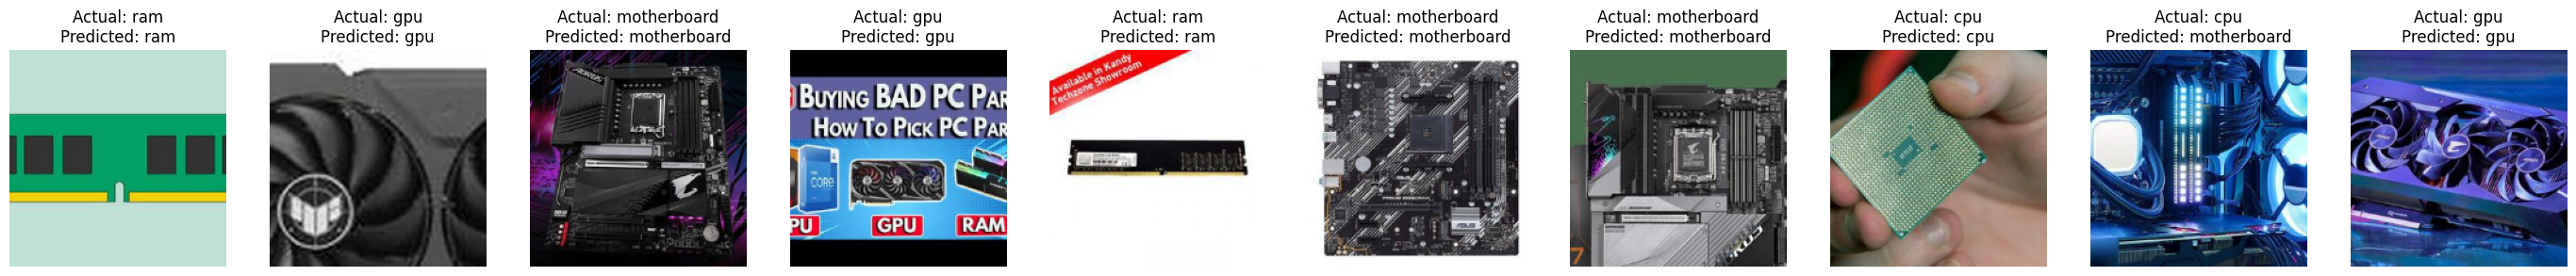

In [27]:


# Ensure the model is in evaluation mode
model_inception_v3.eval()

# Make predictions on the test data
predictions = []
with torch.no_grad():
    for i in range(len(test_images_tensor)):
        output = model_inception_v3(test_images_tensor[i].unsqueeze(0))  # Add batch dimension
        predictions.append(output)

# Convert predictions to numpy array for easier processing
predictions = torch.cat(predictions, dim=0)
predicted_classes = torch.argmax(predictions, dim=1).numpy()

# Visualize the results
plt.figure(figsize=(15,3))
for i in range(10):  # Display first 5 images and predictions
    plt.subplot(1, 10, i + 1)
    pil_image = Image.fromarray((test_images[i] * 255).astype(np.uint8))  # Convert back to PIL image
    plt.imshow(pil_image)
    actual_category = selected_categories[test_labels[i]]  # Get the actual category name
    predicted_category = selected_categories[predicted_classes[i]]  # Get the predicted category name
    plt.title(f'Actual: {actual_category}\nPredicted: {predicted_category}')
    plt.axis('off')
plt.show()


Conclusion:In conclusion, when comparing the two models used for image classification, the Inception v3 model clearly outperforms the custom model built with sequential convolutional layers. The Inception v3 model achieved a higher accuracy of 74.51%, compared to the custom model's 52.29%. This improvement is also reflected in the precision, recall, and f1-scores across all categories, indicating that Inception v3 is better at correctly identifying and classifying the images in this specific dataset.